# Correlation All Predictors - One Hot Encoding

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [3]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [11]:
from loan_approval_lib.standard_data_processing import data_cleaning_algorithm
from loan_approval_lib.standard_data_processing import create_loan_grade_numerical_from_loan_grade
from loan_approval_lib.standard_data_processing import create_person_home_ownership_one_hot_encoder
from loan_approval_lib.standard_data_processing import create_person_home_ownership_one_hot
from loan_approval_lib.standard_data_processing import create_loan_intent_one_hot_encoder
from loan_approval_lib.standard_data_processing import create_loan_intent_one_hot
from loan_approval_lib.standard_data_processing import map_cb_person_default_on_file
from loan_approval_lib.standard_data_processing import create_decision_tree_columns
from loan_approval_lib.standard_data_processing import create_decision_tree_columns_with_id
from loan_approval_lib.standard_data_processing import create_dataframe_copy_and_drop_columns
from loan_approval_lib.standard_data_processing import create_decision_tree_columns
from loan_approval_lib.standard_data_processing import create_decision_tree_columns_with_id

In [4]:
data = loan_approval_lib.load_original_data()

In [5]:
data_train = loan_approval_lib.load_data_train()

In [6]:
data_test = loan_approval_lib.load_data_test()

In [8]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


# Data Cleaning

In [12]:
data = data_cleaning_algorithm(data)

column person_age, number of removed rows: 5
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 897
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 3047
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0


In [13]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,0.25,N,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [14]:
# Loan Grade

create_loan_grade_numerical_from_loan_grade(data, data_train, data_test)

In [15]:
# Person Home Ownership

encoder = create_person_home_ownership_one_hot_encoder(data)

data = create_person_home_ownership_one_hot(encoder, data)
#data_train = create_person_home_ownership_one_hot(encoder, data_train)
#data_test = create_person_home_ownership_one_hot(encoder, data_test)

In [16]:
# Loan Intent

encoder = create_loan_intent_one_hot_encoder(data)

data = create_loan_intent_one_hot(encoder, data)
#data_train = create_loan_intent_one_hot(encoder, data_train)
#data_test = create_loan_intent_one_hot(encoder, data_test)

In [17]:
# Default On File

data = map_cb_person_default_on_file(data)
#data_train = map_cb_person_default_on_file(data_train)
#data_test = map_cb_person_default_on_file(data_test)

In [20]:
data.drop(
    columns=['person_home_ownership', 'loan_intent', 'loan_grade'],
    inplace=True,
)

In [22]:
data.rename(
    columns={
        'loan_grade_numerical': 'loan_grade',
        'person_home_ownership_MORTGAGE': 'mortgage',
        'person_home_ownership_OTHER': 'other',
        'person_home_ownership_OWN': 'own',
        'person_home_ownership_RENT': 'rent',
        'loan_intent_DEBTCONSOLIDATION': 'debt_consolidation',
        'loan_intent_EDUCATION': 'education',
        'loan_intent_HOMEIMPROVEMENT': 'home_improvement',
        'loan_intent_MEDICAL': 'medical',
        'loan_intent_PERSONAL': 'personal',
        'loan_intent_VENTURE': 'venture',
    },
    inplace=True,
)

In [23]:
data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,loan_grade,mortgage,other,own,rent,debt_consolidation,education,home_improvement,medical,personal,venture
1,21,9600,5.0,1000,11.14,0.10,0,2,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,5500,12.87,0.57,0,3,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23,65500,4.0,35000,15.23,0.53,0,2,1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24,54400,8.0,35000,14.27,0.55,1,4,1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,21,9900,2.0,2500,7.14,0.25,0,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,0,30,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,54,120000,4.0,17625,7.49,0.15,0,19,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,65,76000,3.0,35000,10.99,0.46,0,28,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
32579,56,150000,5.0,15000,11.48,0.10,0,26,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Create Correlation

In [47]:
data.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'loan_grade', 'mortgage',
       'other', 'own', 'rent', 'debt_consolidation', 'education',
       'home_improvement', 'medical', 'personal', 'venture'],
      dtype='object')

In [48]:
data = data[[
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_grade',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file',
    'cb_person_cred_hist_length',
    'own',
    'mortgage',
    'rent',
    'other',
    'debt_consolidation',
    'education',
    'home_improvement',
    'medical',
    'personal',
    'venture',
    'loan_status',
]]

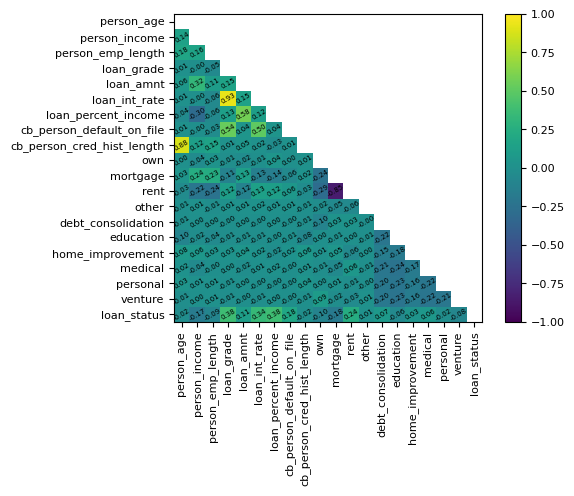

In [49]:
correlation = data.corr()

mask = numpy.triu(numpy.ones_like(correlation, dtype=bool))
correlation = correlation.mask(mask)
correlation.style.background_gradient().highlight_null(color='#f1f1f1')

plt.figure(figsize=(6,4))

#plt.matshow(correlation, vmin=-1, vmax=1)
plt.imshow(correlation, vmin=-1, vmax=1, aspect='equal')
plt.colorbar().ax.tick_params(labelsize=8)

plt.xticks(numpy.arange(len(correlation.columns)), correlation.columns, rotation=90, size=8)
plt.yticks(numpy.arange(len(correlation.columns)), correlation.columns, size=8)

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        value = correlation.iloc[i, j]
        if not numpy.isnan(value):
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black', size=5, rotation=30)

plt.savefig('all_predictor_correlation_one_hot.pdf', bbox_inches='tight')

None

In [50]:
data_select = data[
    [
        'person_age',
        'person_income',
        'person_emp_length',
        'loan_grade',
        'loan_amnt',
        'loan_int_rate',
        'loan_percent_income',
        'cb_person_default_on_file',
        'cb_person_cred_hist_length',
        'own',
        'mortgage',
        'rent',
        'other',
        'loan_status',
    ]
]

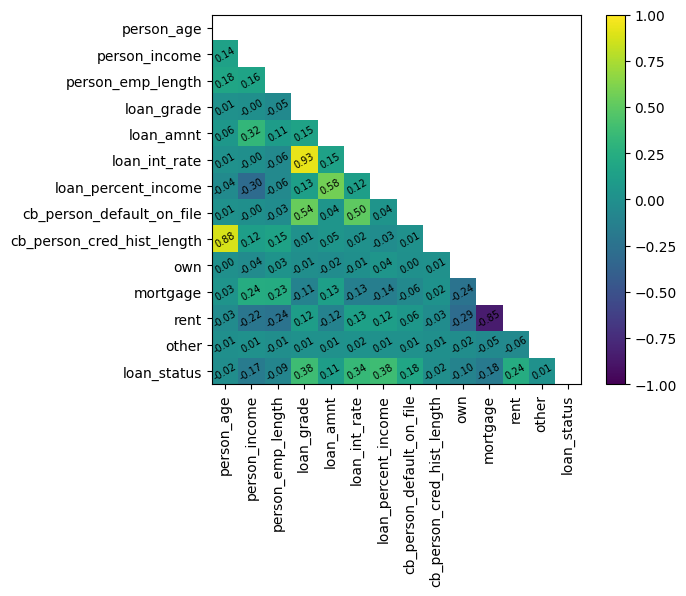

In [51]:
correlation = data_select.corr()

mask = numpy.triu(numpy.ones_like(correlation, dtype=bool))
correlation = correlation.mask(mask)
correlation.style.background_gradient().highlight_null(color='#f1f1f1')

plt.imshow(correlation, vmin=-1, vmax=1, aspect='equal')
plt.colorbar()

plt.xticks(numpy.arange(len(correlation.columns)), correlation.columns, rotation=90)
plt.yticks(numpy.arange(len(correlation.columns)), correlation.columns)

for i in range(len(correlation.columns)):
    for j in range(len(correlation.columns)):
        value = correlation.iloc[i, j]
        if not numpy.isnan(value):
            plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black', size=7, rotation=30)

plt.savefig('all_predictor_correlation_one_hot_select.pdf', bbox_inches='tight')

None